Importing OS and Libraries

In [ ]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/ My Drive/Colab Notebooks/Data Science/healthcare-dataset-stroke-data.csv')

Checking shape of data

In [ ]:
df.shape

(5110, 12)

Top 5 rows

In [ ]:
df.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age,stroke
0,9046,Male,0,1,Yes,Private,Urban,formerly smoked,228.69,36.6,67.0,1
1,51676,Female,0,0,Yes,Self-employed,Rural,never smoked,202.21,NaN,61.0,1
2,31112,Male,0,1,Yes,Private,Rural,never smoked,105.92,32.5,80.0,1
3,60182,Female,0,0,Yes,Private,Urban,smokes,171.23,34.4,49.0,1
4,1665,Female,1,0,Yes,Self-employed,Rural,never smoked,174.12,24.0,79.0,1


Sample data

In [ ]:
df.sample(5)

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age,stroke
3518,5223,Female,0,0,No,Private,Rural,Unknown,78.32,27.0,21.0,0
884,65698,Female,0,0,Yes,Private,Urban,formerly smoked,60.20,27.7,62.0,0
4520,59908,Female,0,0,No,children,Rural,Unknown,121.15,26.1,11.0,0
4212,51476,Male,0,0,Yes,Private,Urban,never smoked,78.85,43.2,48.0,0
3367,17623,Male,0,0,No,Self-employed,Urban,Unknown,87.44,33.5,41.0,0


Basic Stats outline

In [ ]:
df.describe()

,id,hypertension,heart_disease,avg_glucose_level,bmi,age,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,36517.829354,0.097456,0.054012,106.147677,28.893237,43.226614,0.048728
std,21161.721625,0.296607,0.226063,45.283560,7.854067,22.612647,0.215320
min,67.000000,0.000000,0.000000,55.120000,10.300000,0.080000,0.000000
25%,17741.250000,0.000000,0.000000,77.245000,23.500000,25.000000,0.000000
50%,36932.000000,0.000000,0.000000,91.885000,28.100000,45.000000,0.000000
75%,54682.000000,0.000000,0.000000,114.090000,33.100000,61.000000,0.000000
max,72940.000000,1.000000,1.000000,271.740000,97.600000,82.000000,1.000000


Checking Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   smoking_status     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  age                5110 non-null   float64
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We can see BMI has lesser number of NON-NULL values, it tells us that it contains NULL values

Dropping NULL values rows

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   smoking_status     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  age                4909 non-null   float64
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [ ]:
df.dtypes

id                     int64
gender                object
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
smoking_status        object
avg_glucose_level    float64
bmi                  float64
age                  float64
stroke                 int64
dtype: object

Variables Analysis

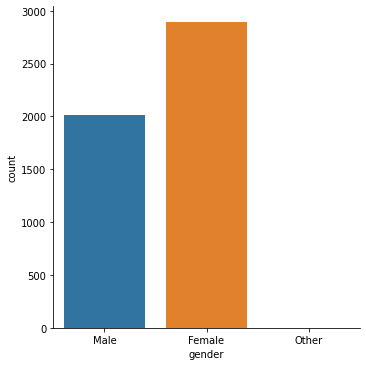

In [ ]:
sns.catplot(x = 'gender', kind = 'count', data = df)

In [ ]:
df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

Other category does not have much data so we will drop it

In [ ]:
df = df[df.gender != "Other"]

In [ ]:
df['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [ ]:
df['gender'] = df['gender'].replace(['Female','Male'],[0,1])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age,stroke
0,9046,1,0,1,Yes,Private,Urban,formerly smoked,228.69,36.6,67.0,1
2,31112,1,0,1,Yes,Private,Rural,never smoked,105.92,32.5,80.0,1
3,60182,0,0,0,Yes,Private,Urban,smokes,171.23,34.4,49.0,1
4,1665,0,1,0,Yes,Self-employed,Rural,never smoked,174.12,24.0,79.0,1
5,56669,1,0,0,Yes,Private,Urban,formerly smoked,186.21,29.0,81.0,1


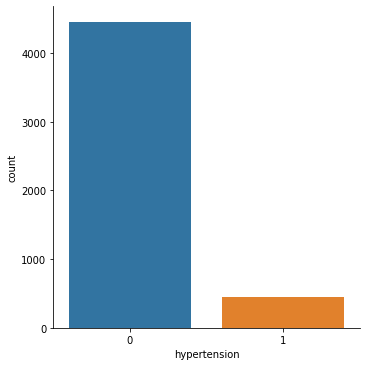

In [ ]:
sns.catplot(x = 'hypertension', kind = 'count', data = df)

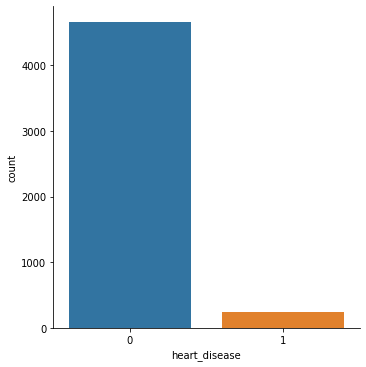

In [ ]:
sns.catplot(x = 'heart_disease', kind = 'count', data = df)

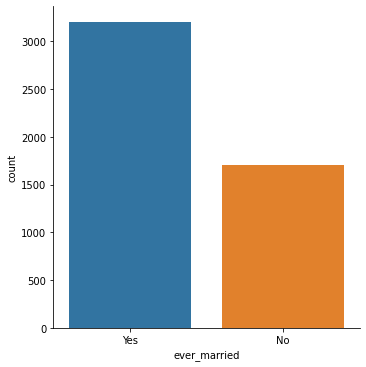

In [ ]:
sns.catplot(x = 'ever_married', kind = 'count', data = df)

In [ ]:
df['ever_married'] = df['ever_married'].replace(['No','Yes'],[0,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age,stroke
0,9046,1,0,1,1,Private,Urban,formerly smoked,228.69,36.6,67.0,1
2,31112,1,0,1,1,Private,Rural,never smoked,105.92,32.5,80.0,1
3,60182,0,0,0,1,Private,Urban,smokes,171.23,34.4,49.0,1
4,1665,0,1,0,1,Self-employed,Rural,never smoked,174.12,24.0,79.0,1
5,56669,1,0,0,1,Private,Urban,formerly smoked,186.21,29.0,81.0,1


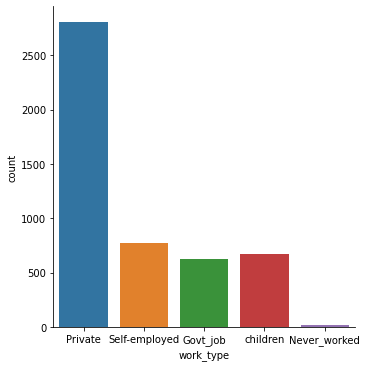

In [ ]:
sns.catplot(x = 'work_type', kind = 'count', data = df)

In [ ]:
df['work_type'].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
df = df[df.work_type != "Never_worked"]

In [ ]:
df['work_type'].value_counts()

Private          2810
Self-employed     775
children          671
Govt_job          630
Name: work_type, dtype: int64

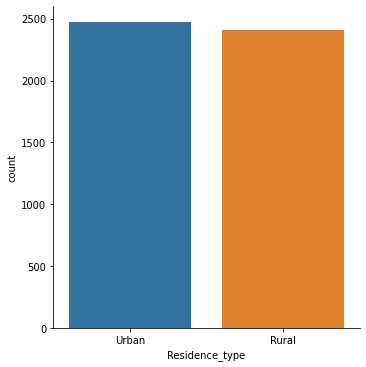

In [ ]:
sns.catplot(x = 'Residence_type', kind = 'count', data = df)

In [ ]:
df['Residence_type'] = df['Residence_type'].replace(['Urban','Rural'],[0,1])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age,stroke
0,9046,1,0,1,1,Private,0,formerly smoked,228.69,36.6,67.0,1
2,31112,1,0,1,1,Private,1,never smoked,105.92,32.5,80.0,1
3,60182,0,0,0,1,Private,0,smokes,171.23,34.4,49.0,1
4,1665,0,1,0,1,Self-employed,1,never smoked,174.12,24.0,79.0,1
5,56669,1,0,0,1,Private,0,formerly smoked,186.21,29.0,81.0,1


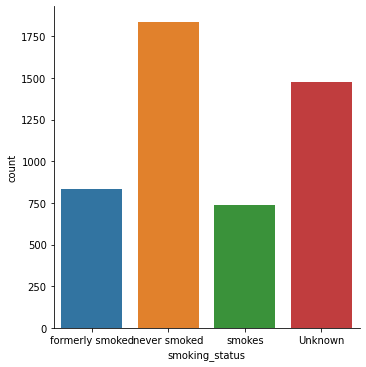

In [ ]:
sns.catplot(x = 'smoking_status', kind = 'count', data = df)

This variable also tells its nominal because there is no relationship between them

In [ ]:
df['smoking_status'].value_counts()

never smoked       1838
Unknown            1475
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64

(array([1208., 1720.,  916.,  307.,  149.,   83.,  189.,  192.,   99.,
          23.]),
 array([ 55.12 ,  76.782,  98.444, 120.106, 141.768, 163.43 , 185.092,
        206.754, 228.416, 250.078, 271.74 ]),
 <a list of 10 Patch objects>)

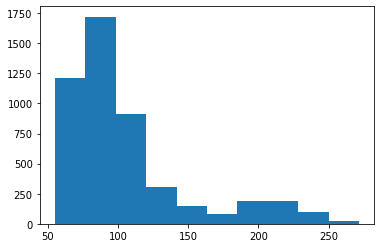

In [ ]:
plt.hist(df['avg_glucose_level'])

(array([ 408., 1951., 1804.,  573.,  105.,   37.,    4.,    2.,    0.,
           2.]),
 array([10.3 , 19.03, 27.76, 36.49, 45.22, 53.95, 62.68, 71.41, 80.14,
        88.87, 97.6 ]),
 <a list of 10 Patch objects>)

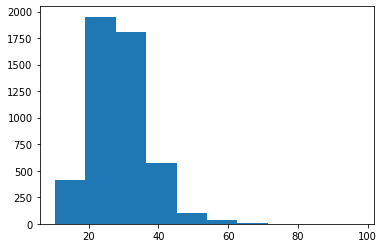

In [ ]:
#plt.scatter(df.index, df['bmi'])
plt.hist(df['bmi'])

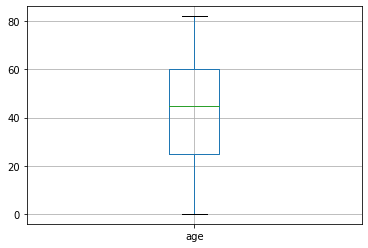

In [ ]:
df.boxplot(column='age')

In [ ]:
df.sort_values(by = ['age'], ascending = [True]).head(117)

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age,stroke
1614,47350,0,0,0,0,children,0,Unknown,139.67,14.1,0.08,0
3295,29955,1,0,0,0,children,1,Unknown,70.33,16.9,0.08,0
3968,41500,1,0,0,0,children,1,Unknown,69.79,13.0,0.16,0
4021,8247,1,0,0,0,children,0,Unknown,109.52,13.9,0.16,0
3618,22877,1,0,0,0,children,0,Unknown,114.71,17.4,0.16,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3715,17337,0,0,0,0,children,1,Unknown,100.74,18.6,1.88,0
4001,60774,1,0,0,0,children,1,Unknown,68.35,19.1,1.88,0
4600,50804,1,0,0,0,children,1,Unknown,65.84,16.1,2.00,0
1246,55744,1,0,0,0,children,0,Unknown,76.25,20.1,2.00,0


In [ ]:
df = df[df['age'] >= 2]

In [ ]:
df.sort_values(by = ['age'], ascending = [True]).head(5)

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age,stroke
4373,16446,1,0,0,0,children,1,Unknown,76.12,16.8,2.0,0
3226,71414,0,0,0,0,children,0,Unknown,125.03,19.8,2.0,0
4568,42400,0,0,0,0,children,0,Unknown,94.92,20.4,2.0,0
986,46323,0,0,0,0,children,1,Unknown,165.11,18.0,2.0,0
1450,70259,0,0,0,0,children,1,Unknown,65.96,19.7,2.0,0


In [ ]:
all(x.is_integer() for x in df.age)

True

In [ ]:
df['age'] = df['age'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age,stroke
0,9046,1,0,1,1,Private,0,formerly smoked,228.69,36.6,67,1
2,31112,1,0,1,1,Private,1,never smoked,105.92,32.5,80,1
3,60182,0,0,0,1,Private,0,smokes,171.23,34.4,49,1
4,1665,0,1,0,1,Self-employed,1,never smoked,174.12,24.0,79,1
5,56669,1,0,0,1,Private,0,formerly smoked,186.21,29.0,81,1


(array([345., 360., 423., 469., 521., 564., 668., 529., 376., 517.]),
 array([ 2., 10., 18., 26., 34., 42., 50., 58., 66., 74., 82.]),
 <a list of 10 Patch objects>)

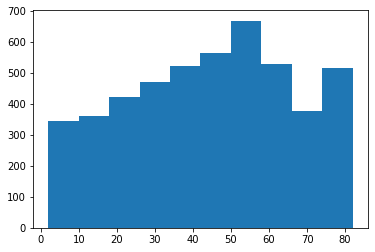

In [ ]:
plt.hist(df['age'])

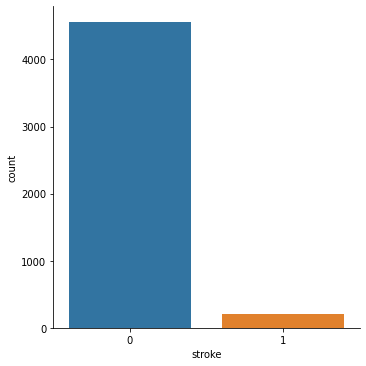

In [ ]:
sns.catplot(x = 'stroke', kind = 'count', data = df)

Class Imbalance - need to perform under or over sampling

Split Dataset

In [ ]:
X = df.iloc[:,1:-1]
X.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age
0,1,0,1,1,Private,0,formerly smoked,228.69,36.6,67
2,1,0,1,1,Private,1,never smoked,105.92,32.5,80
3,0,0,0,1,Private,0,smokes,171.23,34.4,49
4,0,1,0,1,Self-employed,1,never smoked,174.12,24.0,79
5,1,0,0,1,Private,0,formerly smoked,186.21,29.0,81


In [ ]:
y = df.iloc[:,-1]
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

One Hot Encoding for work_type and smoking status

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[4,6])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[  0.     1.     0.   ... 228.69  36.6   67.  ]
 [  0.     1.     0.   ... 105.92  32.5   80.  ]
 [  0.     1.     0.   ... 171.23  34.4   49.  ]
 ...
 [  0.     0.     1.   ...  82.99  30.6   35.  ]
 [  0.     1.     0.   ... 166.29  25.6   51.  ]
 [  1.     0.     0.   ...  85.28  26.2   44.  ]]


Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

Normalzing

In [ ]:
from sklearn.preprocessing import Normalizer
ns = Normalizer().fit(X_train[:,7:8])
X_train[:,7:8] = ns.transform(X_train[:,7:8])
X_train

array([[  0.  ,   1.  ,   0.  , ...,  97.12,  29.2 ,  45.  ],
       [  0.  ,   1.  ,   0.  , ...,  74.2 ,  23.  ,  32.  ],
       [  0.  ,   1.  ,   0.  , ..., 217.79,  26.1 ,  72.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,  69.87,  18.  ,   9.  ],
       [  0.  ,   0.  ,   0.  , ...,  91.3 ,  20.7 ,   5.  ],
       [  0.  ,   1.  ,   0.  , ...,  97.49,  26.9 ,  38.  ]])

In [ ]:
X_test[:,7:8] = ns.transform(X_test[:,7:8])
print(X_test)

[[  0.     1.     0.   ...  77.93  35.7   57.  ]
 [  0.     0.     0.   ...  99.75  16.     2.  ]
 [  0.     1.     0.   ...  79.2   22.4   15.  ]
 ...
 [  0.     0.     1.   ...  77.24  41.2   42.  ]
 [  0.     0.     1.   ... 101.93  34.    46.  ]
 [  0.     1.     0.   ...  97.78  22.6   31.  ]]


Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,7:] = sc.fit_transform(X_train[:,7:])
print(X_train)

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ... -1.96169045e-01
  -1.54767601e-03  5.05365434e-02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ... -7.05580027e-01
  -7.97773151e-01 -5.43136236e-01]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  2.48579532e+00
  -3.99660413e-01  1.28354924e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.01816918e-01
  -1.43989047e+00 -1.59348038e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.25522095e-01
  -1.09314712e+00 -1.77614893e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ... -1.87945569e-01
  -2.96921642e-01 -2.69133415e-01]]


In [ ]:
X_test[:,7:] = sc.fit_transform(X_test[:,7:])
print(X_test)

[[ 0.          1.          0.         ... -0.59562468  0.88128367
   0.58458163]
 [ 0.          0.          0.         ... -0.09646996 -1.68930353
  -1.96166183]
 [ 0.          1.          0.         ... -0.56657213 -0.8541889
  -1.35982247]
 ...
 [ 0.          0.          1.         ... -0.61140913  1.5989603
  -0.10984841]
 [ 0.          0.          1.         ... -0.04660025  0.65945635
   0.07533293]
 [ 0.          1.          0.         ... -0.14153572 -0.82809157
  -0.6190971 ]]
